# Identifikasi Masalah

<h3><b>Problem Statement</b></h3>

Tujuan proyek ini yaitu peningkatan izin penjualan mobil sampai 80% yang dapat dijual di pasar telah sesuai standar dengan cara memperhatikan tipe bodi, transmisi, perakitan, warna, lokasi, dan tipe mesin sehingga memperbanyak unit yang dijual pada akhir tahun 2024.

[Referensi data yang digunakan](https://www.kaggle.com/datasets/mohidabdulrehman/ultimate-car-price-prediction-dataset)

[Dashboard](https://public.tableau.com/views/h8dsft_Milestone1_Achmad_Raihan/CarsSaleTotal?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

# Data Loading

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('pakwheels.csv')

In [3]:
df.head(7)

,Unnamed: 0,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status
0,0,Toyota,Vitz,2385000,2017,Islamabad,9869,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered
1,1,Toyota,Corolla,111000,2019,KPK,11111,Petrol,1300,White,Local,Sedan,Automatic,Registered
2,2,Suzuki,Alto,1530000,2019,KPK,17500,Petrol,660,White,Local,Hatchback,Automatic,Un-Registered
3,3,Suzuki,Alto,1650000,2019,Punjab,9600,Petrol,660,White,Local,Hatchback,Manual,Registered
4,4,Toyota,Corolla,1435000,2010,Islamabad,120000,Petrol,1300,Black,Local,Sedan,Manual,Registered
5,5,Honda,Civic,3850000,2017,Punjab,22000,Petrol,1500,Black,Local,Sedan,Automatic,Registered
6,6,Suzuki,Wagon,1440000,2017,Punjab,31000,Petrol,1000,White,Local,Hatchback,Manual,Registered


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46022 entries, 0 to 46021
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           46022 non-null  int64 
 1   Company Name         46022 non-null  object
 2   Model Name           46022 non-null  object
 3   Price                46022 non-null  int64 
 4   Model Year           46022 non-null  int64 
 5   Location             46022 non-null  object
 6   Mileage              46022 non-null  int64 
 7   Engine Type          46022 non-null  object
 8   Engine Capacity      46022 non-null  int64 
 9   Color                46022 non-null  object
 10  Assembly             46022 non-null  object
 11  Body Type            46022 non-null  object
 12  Transmission Type    46022 non-null  object
 13  Registration Status  46022 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.9+ MB


Berdasarkan informasi diatas kondisi data tidak ada yang *null*. Kemudian, setiap *value* yang dihasilkan sudah sesuai dengan format yang diharapkan tanpa harus mengubah tipe kolom tersebut. Tetapi, terdapat kolom yang tidak diperlukan muncul dan itu harus dihilangkan untuk kenyamanan analisis data

# Data Cleaning

In [5]:
df.drop(columns='Unnamed: 0', inplace=True)

# Persebaran Harga Mobil yang Telah Memiliki Izin Penjualan

In [6]:
# Mengubah status penjualan ke dalam bentuk diskrit
df['Registration Status'] = df['Registration Status'].replace({'Registered':1,'Un-Registered':0})

C:\Users\Rontlond\AppData\Local\Temp\ipykernel_2236\2982400346.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Registration Status'] = df['Registration Status'].replace({'Registered':1,'Un-Registered':0})


Price in Average: 1845658.983908369 rupee
Median of Price: 1380000.0 rupee
Mode of Price: 650000 rupee
Price in Maximum: 65000000 rupee
Price in Minimum: 111000 rupee

Skewness of Price: 8.01564389489514
Kurtosis of Price: 99.3673274528013



<Axes: ylabel='Frequency'>

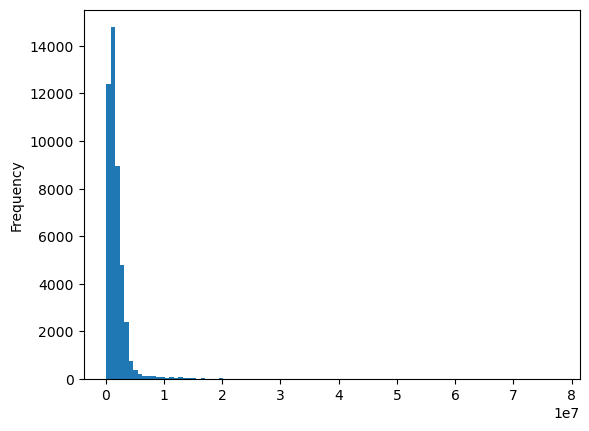

In [7]:
# Mengelompokkan khusus pada mobil yang hanya telah memiliki Izin Penjualan
df_1 = df[df['Registration Status'] == 1]

# Central tendency
print(f'Price in Average: {df_1['Price'].mean()} rupee')
print(f'Median of Price: {df_1['Price'].median()} rupee')
print(f'Mode of Price: {df_1['Price'].mode().values[0]} rupee')
print(f'Price in Maximum: {df_1['Price'].max()} rupee')
print(f'Price in Minimum: {df_1['Price'].min()} rupee\n')

# Normality test
print(f"Skewness of Price: {df_1['Price'].skew()}")
print(f"Kurtosis of Price: {df_1['Price'].kurtosis()}\n")
df['Price'].plot(kind='hist', bins=100)

Berdasarkan informasi diatas, terdapat perbedaan yang signifikan antara harga maximum mobil dengan yang umumnya dijual sehingga memengaruhi rata-rata yang dihasilkan dan menghasilkan distribusi yang bersifat *positive skew*.

In [8]:
std = df_1['Price'].std()     # Standard deviation of Price
N = len(df_1)                    # Length of the data
low, up = stats.norm.interval(    # Will have lower & upper limit
    0.95,                         # Confidence level in 95%
    loc=df_1['Price'].mean(), # Average of Price that store in warehouse
    scale=std/np.sqrt(N)          # The width of dist. from average
    )         
print('Lower Limit:',low)   # Lower limit
print('Upper Limit:',up)    # Upper limit

Lower Limit: 1823296.313195046
Upper Limit: 1868021.654621692


<Axes: ylabel='Frequency'>

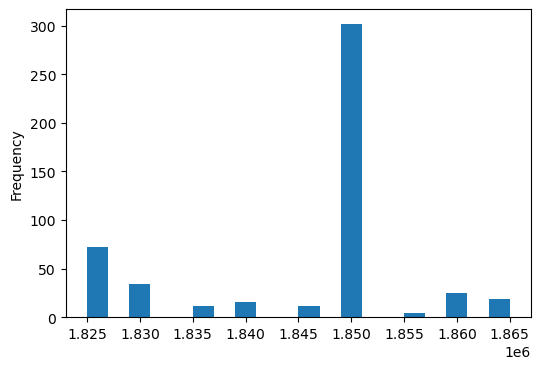

In [9]:
# outrange -> nilainya dibawah batas bawah ATAU diatas batas atas
out_range = df_1['Price'][(df_1['Price']<low) | (df_1['Price']>up)]

# inrange  -> nilainya diatas batas bawah DAN dibawah batas atas
in_range = df_1['Price'][(df_1['Price']>=low) & (df_1['Price']<=up)]

# Display price estimation
fig, ax = plt.subplots(figsize=(6,4))
in_range.plot(kind='hist',bins=20)

Berdasarkan informasi diatas, kebanyakan mobil yang dijual berkisar INR 1823296.313195046 hingga INR 1868021.654621692. 

# Faktor yang Memengaruhi Izin Penjualan Kendaraan

In [10]:
cols = df.drop(columns=['Registration Status', 'Price', 'Model Year', 'Mileage', 'Engine Capacity']).columns

for col in cols:
    cross = pd.crosstab(df[col],df['Registration Status'])
    pval = stats.chi2_contingency(cross).pvalue
    prompt = "memiliki pengaruh satu sama lain" if (pval<0.05) else ""
    print(f"P-value of {col} and Registration Status: {pval} {prompt}")

P-value of Company Name and Registration Status: 2.5014337384900916e-254 memiliki pengaruh satu sama lain
P-value of Model Name and Registration Status: 0.0 memiliki pengaruh satu sama lain
P-value of Location and Registration Status: 3.725014185228634e-12 memiliki pengaruh satu sama lain
P-value of Engine Type and Registration Status: 0.0 memiliki pengaruh satu sama lain
P-value of Color and Registration Status: 4.3802487983754045e-43 memiliki pengaruh satu sama lain
P-value of Assembly and Registration Status: 0.0 memiliki pengaruh satu sama lain
P-value of Body Type and Registration Status: 0.0 memiliki pengaruh satu sama lain
P-value of Transmission Type and Registration Status: 0.0 memiliki pengaruh satu sama lain


Uji hipotesis yang dilakukan menggunakan variabel yang bersifat kategorikal, sehingga menggunakan metode *Chi-Squared Test* dengan acuan *confidence level* 95% dan keterangan sebagai berikut:
- H0: suatu variable dan `Registration Status` tidak memiliki pengaruh satu sama lain.
- H1: suatu variable dan `Registration Status` memiliki pengaruh satu sama lain.

In [11]:
df.iloc[2:4]

,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status
2,Suzuki,Alto,1530000,2019,KPK,17500,Petrol,660,White,Local,Hatchback,Automatic,0
3,Suzuki,Alto,1650000,2019,Punjab,9600,Petrol,660,White,Local,Hatchback,Manual,1


Berdasarkan uji hipotesis yang telah dilakukan, Company Name, Model Name, Location, Engine Type, Color, Assembly, Body Type, Transmission Type merupakan faktor yang memengaruhi status perijinan penjualan mobil. Meskipun begitu, suatu perusahaan dimana merilis model yang sama tidak menjamin mobil tersebut mendapatkan izin penjualan. Jika dilihat secara mendalam, perbedaan lokasi dan jenis transmisi menjadi penyebab mobil tersebut tidak mendapatkan izin penjualan. Oleh karena itu, setiap mobil yang ingin dijual harus memiliki spesifikasi sesuai standar, termasuk lokasi penjualan yang telah ditetapkan agar menghindari adanya sindikat/calo dalam bertransaksi.

In [14]:
df.groupby('Company Name')[['Registration Status']].mean()

,Registration Status
Company Name,
Adam,1.000000
Audi,0.947115
BMW,0.963504
Chery,1.000000
Chevrolet,1.000000
DFSK,1.000000
Daewoo,1.000000
Daihatsu,0.846997
FAW,0.994652


Dari banyaknya perusahaan yang merilis kendaraannya, Mazda dan Nissan merupakan merek mobil yang memiliki persentase perizinan penjualan dibawah 80%. Artinya ada banyak kendaraan yang mereka rilis berada dalam kondisi belum mendapatkan izin penjualan yang disebabkan spesifikasinya tidak sesuai standar.

In [15]:
df_model = df.groupby('Model Name')[['Registration Status']].mean()
df_model

,Registration Status
Model Name,
3,1.000000
5,1.000000
7,0.882353
A3,0.944444
A4,0.970588
...,...
X5,1.000000
X6,1.000000
XF,1.000000


In [16]:
df_model[df_model['Registration Status'] >= 0.8]

,Registration Status
Model Name,
3,1.000000
5,1.000000
7,0.882353
A3,0.944444
A4,0.970588
...,...
X5,1.000000
X6,1.000000
XF,1.000000


Dari banyaknya kendaraan yang telah rilis, sebanyak 36 model yang memiliki persentase perizinan penjualan dibawah 80%. Artinya ada banyak model yang belum mendapatkan izin penjualan. Maka, spesifikasi pada mobil tersebut harus diperhatikan agar mendapatkan izin penjualan.

In [17]:
df.groupby('Location')[['Registration Status']].mean()

,Registration Status
Location,
Balochistan,0.953704
Islamabad,0.919357
KPK,0.930579
Kashmir,0.991935
Punjab,0.933204
Sindh,0.913793


Berdasarkan informasi diatas, rata-rata perusahaan telah menempatkan penjualan mobil sesuai lokasi yang telah ditentukan.

In [18]:
df.groupby('Engine Type')[['Registration Status']].mean()

,Registration Status
Engine Type,
Diesel,0.983887
Hybrid,0.611536
Petrol,0.936820


Berdasarkan informasi diatas, terdapat banyak kendaraan hybrid yang belum mendapatkan izin penjualan. Hal ini harus segera diselesaikan oleh setiap perusahaan agar pada akhir tahun 2024 mobil yang dijual sudah dalam kondisi memiliki izin penjualan.

In [19]:
df.groupby('Color')[['Registration Status']].mean()

,Registration Status
Color,
Assembly,0.877713
Beige,0.920690
Black,0.919681
Blue,0.938411
Bronze,0.976303
Brown,0.903346
Burgundy,0.882736
Gold,0.973081
Green,0.928571


Berdasarkan informasi diatas, mungkin ini hal yang sederhana, tetapi bisa menjadi pertimbangan dalam *tracking* kendaraan yang sebagian diantaranya belum memiliki izin penjualan, yaitu kendaraan berwarna Orange yang dirilis tiap perusahaan.

In [20]:
df.groupby('Assembly')[['Registration Status']].mean()

,Registration Status
Assembly,
Imported,0.807926
Local,0.984492


Berdasarkan informasi diatas, rata-rata perusahaan yang merakit kendaraannya di dalam atau diluar negeri telah memiliki izin penjualan sesuai standar yang telah ditentukan.

In [21]:
df.groupby('Body Type')[['Registration Status']].mean()

,Registration Status
Body Type,
Cross Over,0.605753
Hatchback,0.910920
Mini Van,0.849875
SUV,0.902092
Sedan,0.974979
Van,0.924747


Berdasarkan informasi diatas, sebagian kendaraan dengan tipe badan *cross over* masih belum memiliki izin penjualan.

In [22]:
df.groupby('Transmission Type')[['Registration Status']].mean()

,Registration Status
Transmission Type,
Automatic,0.856943
Manual,0.989192


Berdasarkan informasi diatas, rata-rata perusahaan yang merilis kendaraannya telah menempatkan transmisinya sesuai standar yang ditentukan.

# Jenis Kendaraan yang Dapat Dibeli Konsumen

In [23]:
model = df[df['Registration Status']==1][['Company Name', 'Model Name', 'Registration Status']].groupby(['Company Name', 'Model Name']).count()
model

Registration Status
Company Name Model Name                     
Adam         Revo                          1
Audi         A3                           34
             A4                           66
             A5                           37
             A6                           43
...                                      ...
Toyota       Voxy                          2
             Wish                         13
             iQ                            6
United       Bravo                        54
Volvo        S40                           1

[195 rows x 1 columns]

Berdasarkan informasi diatas, perusahaan telah merilis sejumlah mobil dengan berbagai model yang dapat dibeli konsumen dimana telah memiliki izin penjualan.

# Pengaruh Tipe Bodi dan Mesin dalam Izin Penjualan Mobil

In [24]:
df.groupby('Body Type')[['Registration Status']].mean()

,Registration Status
Body Type,
Cross Over,0.605753
Hatchback,0.910920
Mini Van,0.849875
SUV,0.902092
Sedan,0.974979
Van,0.924747


In [25]:
df.groupby('Engine Type')[['Registration Status']].mean()

,Registration Status
Engine Type,
Diesel,0.983887
Hybrid,0.611536
Petrol,0.936820


Jika mereka ingin meningkatkan izin penjualan ke pasar sesuai target yang ditentukan, maka tiap perusahaan yang merilis mobil dengan tipe bodi dan mesin berupa *cross over* dan *hybrid* harus memperhatikan secara mendalam proses produksi. Hal itu dilakukan karena kedua aspek tersebut memiliki spesifikasi kendaraan paling memengaruhi sulitnya mendapatkan izin penjualan.

# Lokasi Pembelian Mobil

In [26]:
# Lokasi mobil berdasarkan perusahaan, model, dan jumlah yang tersedia
lokasi = df[df['Registration Status']==1][['Location', 'Company Name', 'Model Name', 'Registration Status']].groupby(['Location', 'Company Name', 'Model Name']).count()
lokasi

Registration Status
Location    Company Name Model Name                     
Balochistan Daewoo       Racer                         1
            Daihatsu     Cuore                         4
                         Mira                          2
            Honda        Accord                        2
                         City                          2
...                                                  ...
Sindh       Toyota       Surf                         26
                         Vitz                        329
                         Wish                          4
                         iQ                            3
            United       Bravo                         2

[645 rows x 1 columns]

In [27]:
# Lokasi penjualan berdasarkan jumlah mobil yang tersedia
lokasi_ringkas = df[df['Registration Status']==1][['Location', 'Registration Status']].groupby(['Location']).count()
lokasi_ringkas

,Registration Status
Location,
Balochistan,309
Islamabad,6122
KPK,4933
Kashmir,246
Punjab,23080
Sindh,8003


Berdasarkan informasi diatas, terdapat 6 lokasi penjualan mobil yang telah memiliki izin penjualan. Setiap lokasi memiliki jenis kendaraan dengan jumlah yang berbeda-beda.

# Tahun Produksi Mobil

In [28]:
# Lokasi penjualan berdasarkan jumlah mobil yang tersedia
tahun_ringkas = df[df['Registration Status']==1][['Model Year', 'Registration Status']].groupby(['Model Year']).count()
tahun_ringkas

,Registration Status
Model Year,
1990,177
1991,155
1992,212
1993,242
1994,245
1995,339
1996,440
1997,397
1998,399


In [29]:
# Lokasi mobil berdasarkan perusahaan, model, dan jumlah yang tersedia
tahun = df[df['Registration Status']==1][['Model Year', 'Company Name', 'Model Name', 'Registration Status']].groupby(['Model Year', 'Company Name', 'Model Name']).count()
tahun

Registration Status
Model Year Company Name Model Name                     
1990       BMW          3                             2
           Honda        Civic                         8
           Mitsubishi   Galant                        2
                        Lancer                        5
                        Pajero                       22
...                                                 ...
2019       Toyota       Passo                         2
                        Prius                         1
                        Rush                          3
                        Vitz                          5
           United       Bravo                        54

[1464 rows x 1 columns]

Berdasarkan informasi diatas, terdapat berbagai mobil yang telah diproduksi sejak tahun 1990 dan memiliki izin penjualan.

# Kesimpulan

Berdasarkan analisis yang telah dilakukan, jika perusahaan ingin meningkatkan izin penjualan mobil ke pasar sesuai target yang ditentukan, maka mereka yang merilis model dengan tipe bodi dan mesin berupa *cross over* dan *hybrid* harus memperhatikan secara mendalam proses produksi. Hal itu dilakukan karena kedua aspek tersebut memiliki spesifikasi kendaraan paling memengaruhi sulitnya mendapatkan izin penjualan. Kemudian, penjualan mobil tersebar di beberapa kota yaitu Balochistan, Islamabad, KPK, Kashmir, Punjab, Sindh. 